# **Step to solve**
1.Data Collection and Problem Statement

2.Exploratory Data Analysis with Pandas and NumPy

3.Data Preparation using Sklearn

4.Selecting and Training a few Machine Learning Models

5.Cross-Validation and Hyperparameter Tuning using Sklearn

6.Deploying the Final Trained Model on Heroku via a Flask App 

In [120]:
# Import all libraries
import numpy as np
import pandas as pd

#Visalization Library
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing Library
from sklearn.preprocessing import LabelEncoder

#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV

import statsmodels.api as sm


# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor


In [78]:
# Then read and load the file into a dataframe using the read_csv() method:
new_scms = pd.read_csv('/content/drive/MyDrive/ML Project/SCMS_Delivery_History_Dataset.csv')
# Display first 5 records
new_scms.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# **Data Preprocessing**

In [79]:
df = new_scms.copy()
# Print a concise summary( including the index dtype and columns, non-null values and memory usage)
# of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

From the above dataset we see that their are some missing values and and 26 feature is in object

In [80]:
 #convert the datatype object to numeric
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'],errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'],errors='coerce')

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [81]:
#Clean the data
#Fill out the missing values
missing_values = df[df['Shipment Mode'].isna()].index
df= df.drop(missing_values,axis=0).reset_index(drop = True)
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
df['Line Item Insurance (USD)'] =df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

    # fill the missing values
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].mean())
#df.isna().sum()

In [82]:
# Add new target column which calculate the shipping price for prediction 
df['Price_Shipment'] = df['Freight Cost (USD)'] + df['Line Item Insurance (USD)']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            9964 non-null   int64  
 1   Project Code                  9964 non-null   object 
 2   PQ #                          9964 non-null   object 
 3   PO / SO #                     9964 non-null   object 
 4   ASN/DN #                      9964 non-null   object 
 5   Country                       9964 non-null   object 
 6   Managed By                    9964 non-null   object 
 7   Fulfill Via                   9964 non-null   object 
 8   Vendor INCO Term              9964 non-null   object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  9964 non-null   object 
 11  PO Sent to Vendor Date        9964 non-null   object 
 12  Scheduled Delivery Date       9964 non-null   object 
 13  Del

In [83]:
df = df.drop(['Freight Cost (USD)','Line Item Insurance (USD)'],axis= 1)


In [84]:
df.shape

(9964, 32)


# **Exploratory Data Analysis**


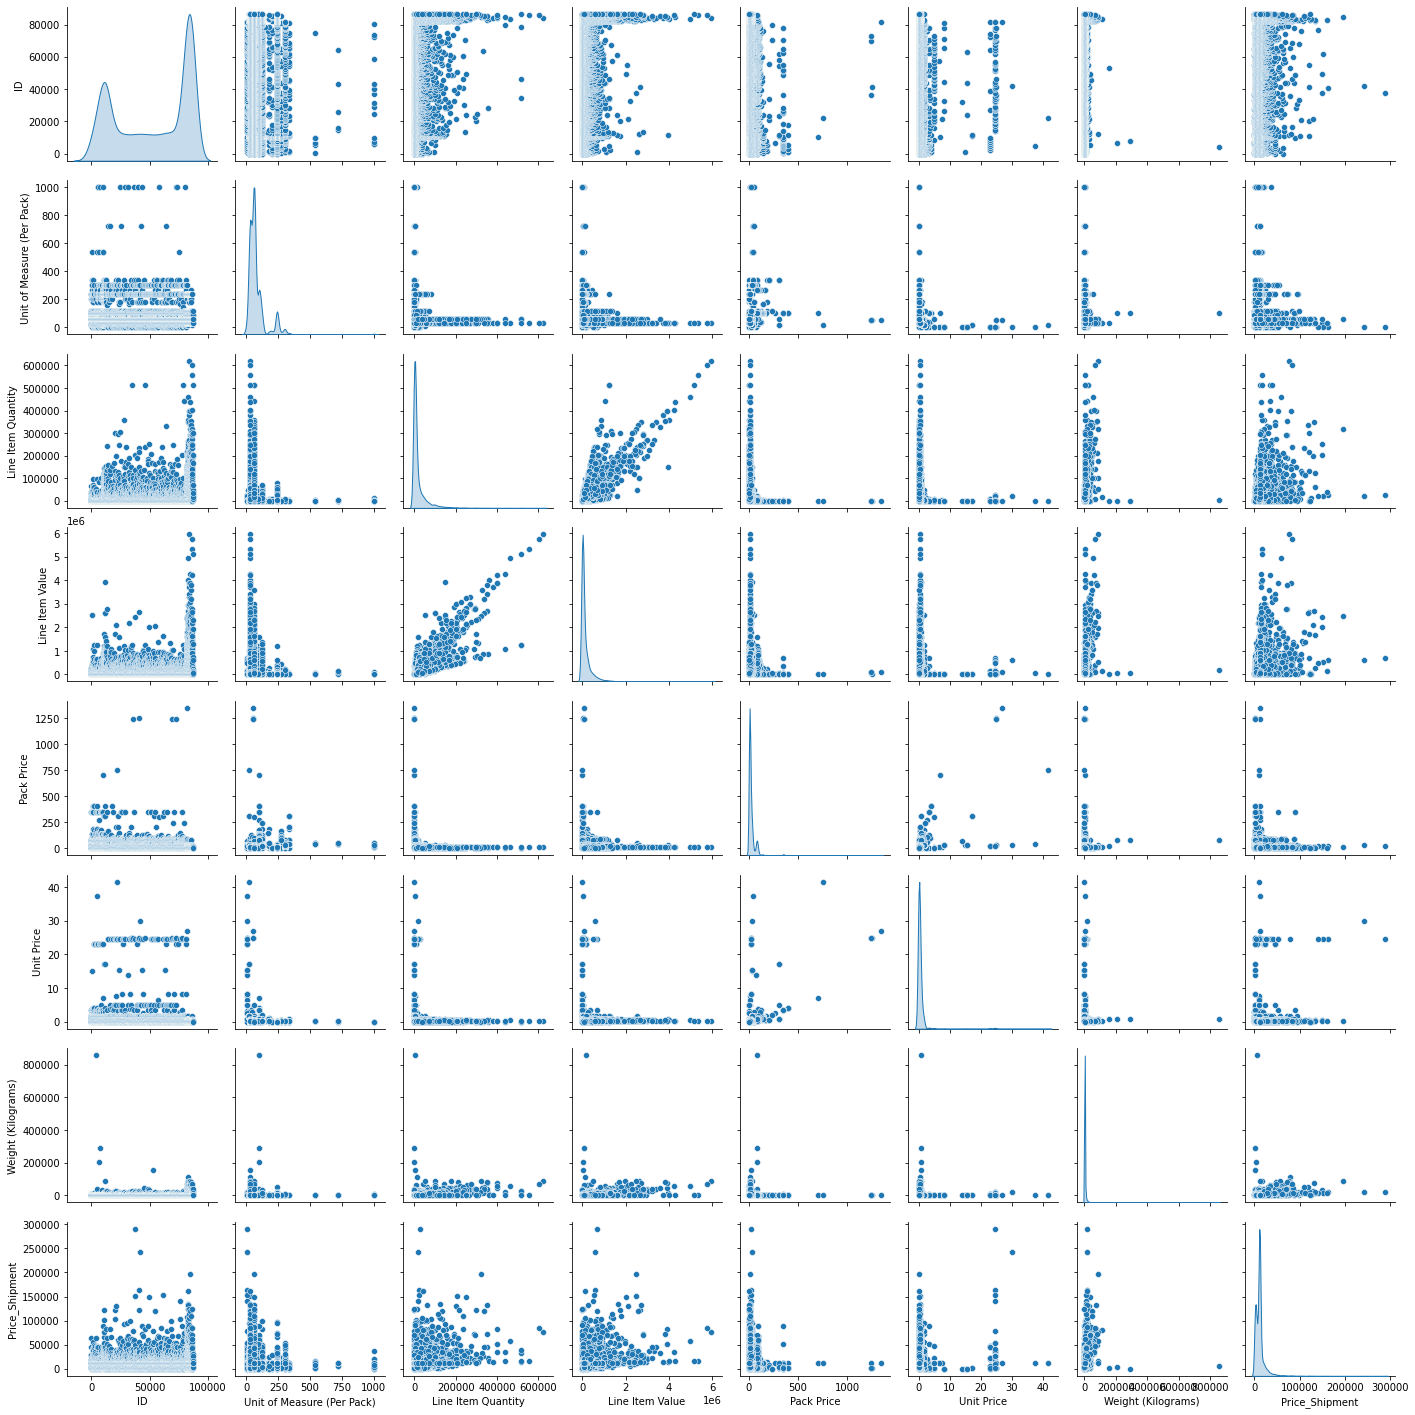

In [85]:
sns.pairplot(df,diag_kind = 'kde')

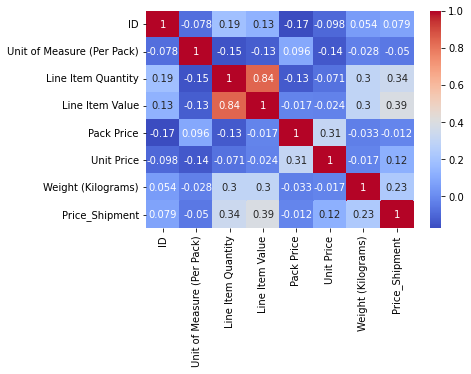

In [86]:
#Visualising the data using heatmap
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [88]:
le = LabelEncoder()
for i in df:
  df[i] = le.fit_transform(df[i].astype('str'))

In [100]:
x = df.drop(['Price_Shipment'],axis=1)
y = df['Price_Shipment']
# Train test datset
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size =0.22)

In [101]:
#fit random forest

 # create regressor object
random_forest = RandomForestRegressor(n_estimators=100)


# fit the regressor with x and y data
random_forest.fit(X_train,y_train)

#Predicting a new result
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)


print("Random Forest Accuracy : ",acc_random_forest)

acc_random_forest_testdata = round(random_forest.score(X_test, y_test) * 100, 2)
print('Test data Random forest Accuacy :',acc_random_forest_testdata)

Random Forest Accuracy :  94.67
Test data Random forest Accuacy : 61.69


# ***Select the Feature by Forword Selection***

In [108]:
target=df[['Price_Shipment']]

def forward_selection(df, target, significance_level=0.05):
    initial_features =df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
          model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
          new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


print(forward_selection(X_train,y_train))
print('Total Feature is ',len(forward_selection(X_train,y_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['First Line Designation', 'Vendor INCO Term', 'Vendor', 'Dosage Form', 'Manufacturing Site', 'Project Code', 'Delivery Recorded Date', 'Scheduled Delivery Date', 'Sub Classification', 'Molecule/Test Type', 'Weight (Kilograms)', 'Dosage', 'Line Item Quantity', 'Line Item Value', 'Delivered to Client Date', 'Pack Price']
Total Feature is  16


In [112]:
fs_df= df.copy()


In [131]:
train_x2  =fs_df[['First Line Designation', 'Vendor INCO Term', 'Vendor', 'Dosage Form', 
                      'Manufacturing Site', 'Project Code', 'Delivery Recorded Date',
                      'Scheduled Delivery Date', 'Sub Classification', 'Molecule/Test Type', 
                      'Weight (Kilograms)', 'Dosage', 'Line Item Quantity', 'Line Item Value',
                      'Delivered to Client Date', 'Pack Price']]
print(train_x2.shape)


train_y2 = fs_df[['Price_Shipment']]

(9964, 16)


In [133]:
# train_test_split 
X_train1,X_test1,y_train1,y_test1 = train_test_split(train_x2,train_y2,test_size =0.22)


In [142]:
#fit decision tree
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train1,y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree = round(decision_tree.score(X_train1,y_train1) * 100, 2)

print('Decision tree Accuacy :',acc_decision_tree)
#print("Random Forest Accuracy : ",acc_random_forest)
acc_testdata = round(decision_tree.score(X_test1,y_test1) * 100, 2)
print('Test data Decision tree Accuacy :',acc_testdata)

Decision tree Accuacy : 99.99
Test data Decision tree Accuacy : 22.09


In [143]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test1, Y_pred))
print(math.sqrt(mean_squared_error(y_test1, Y_pred)))

5464722.553123575
2337.674603772641


In [134]:
#fit random forest

 # create regressor object
random_forest = RandomForestRegressor(n_estimators=100)


# fit the regressor with x and y data
random_forest.fit(X_train1,y_train1)

#Predicting a new result
Y_prediction = random_forest.predict(X_test1)

random_forest.score(X_train1,y_train1)
acc_random_forest = round(random_forest.score(X_train1,y_train1) * 100, 2)


print("Random Forest Accuracy : ",acc_random_forest)

acc_random_forest_testdata = round(random_forest.score(X_test1, y_test1) * 100, 2)
print('Test data Random forest Accuacy :',acc_random_forest_testdata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Accuracy :  94.57
Test data Random forest Accuacy : 58.22


In [140]:
model=RandomForestRegressor(n_estimators=150,max_features=5,min_samples_leaf=25)
cv_res = cross_val_score(model,X_train1,y_train1, cv=10)

cv_res1 = cross_val_score(model,X_test1, y_test1, cv = 10)
print(cv_res.mean()*100)
print(cv_res1.mean()*100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

59.26674069973552
53.84315906707787


In [144]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test1, Y_prediction))
print(math.sqrt(mean_squared_error(y_test1, Y_prediction)))

2930237.1163209947
1711.7935378780335
